In [1]:
import pandas as pd

In [2]:
import sqlite3

<h2><center>Соединение с БД</center></h2>

In [3]:
connection = sqlite3.connect('../data/checking-logs.sqlite')

<h2><center>Запросы к БД</center></h2>

In [4]:
visits = pd.io.sql.read_sql("select vi.views as date, vi.count as views, com.count as commits \
                            from (select DATE(datetime) as views, count(*) as count, uid\
                            from pageviews where uid like '%user%' group by views) as vi inner join  \
                            (select DATE(timestamp) commits, count(*) as count, uid \
                            from checker where uid like '%user%' group by commits) as com on vi.views = com.commits", \
                            connection, parse_dates='date', index_col='date')

In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2020-04-17 to 2020-05-21
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   views    32 non-null     int64
 1   commits  32 non-null     int64
dtypes: int64(2)
memory usage: 768.0 bytes


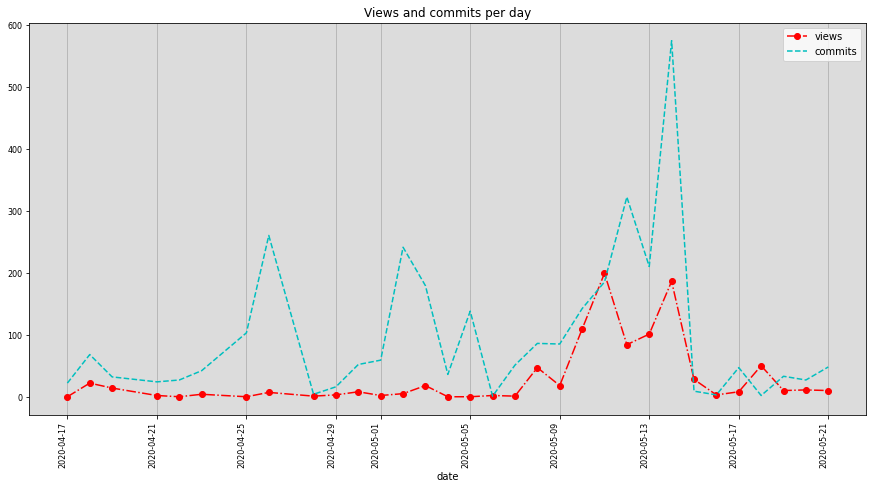

In [6]:
axes = visits.plot(fontsize=8, figsize=(15, 8), title='Views and commits per day', xlabel='date', rot=90, \
             style={'views': '-.or', 'commits': '--c'})

axes.patch.set_facecolor('#DCDCDC')
axes.grid(axis='x')

<h2><center>Закрытие соединения с БД</center></h2>

In [7]:
connection.close()

<h2><center>Ответ на вопрос</center></h2>

<h2>The answer is 2</h2>